# BGGN 212 Co-evolution Project

In [7]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# FUNCTION
def coEvo(X,Y,u1a,u1s,u2a,u2s,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((100000,3))
    mutrate1a = np.zeros((100000,1))
    mutrate1s = np.zeros((100000,1))
    mutrate2a= np.zeros((100000,1))
    mutrate2s= np.zeros((100000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
    
    # Main loop
    while t < T and ((count1)<100000):
        if X == 0 | Y==0:
            break
        
        #u1a =10000-(X)*_alpha1
        #u1s =10000-(X)*_beta1 
        #u2a =10000-(Y)*_alpha2  
        #u2s =10000-(Y)*_beta2

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0

        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s

        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1

        data[count1,:]=[t, X, Y]
        count1+=1
        
    data=data[0:count1,:]
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;


## I. All u are the same. 
### (1.) No a (antagonistic) mutations

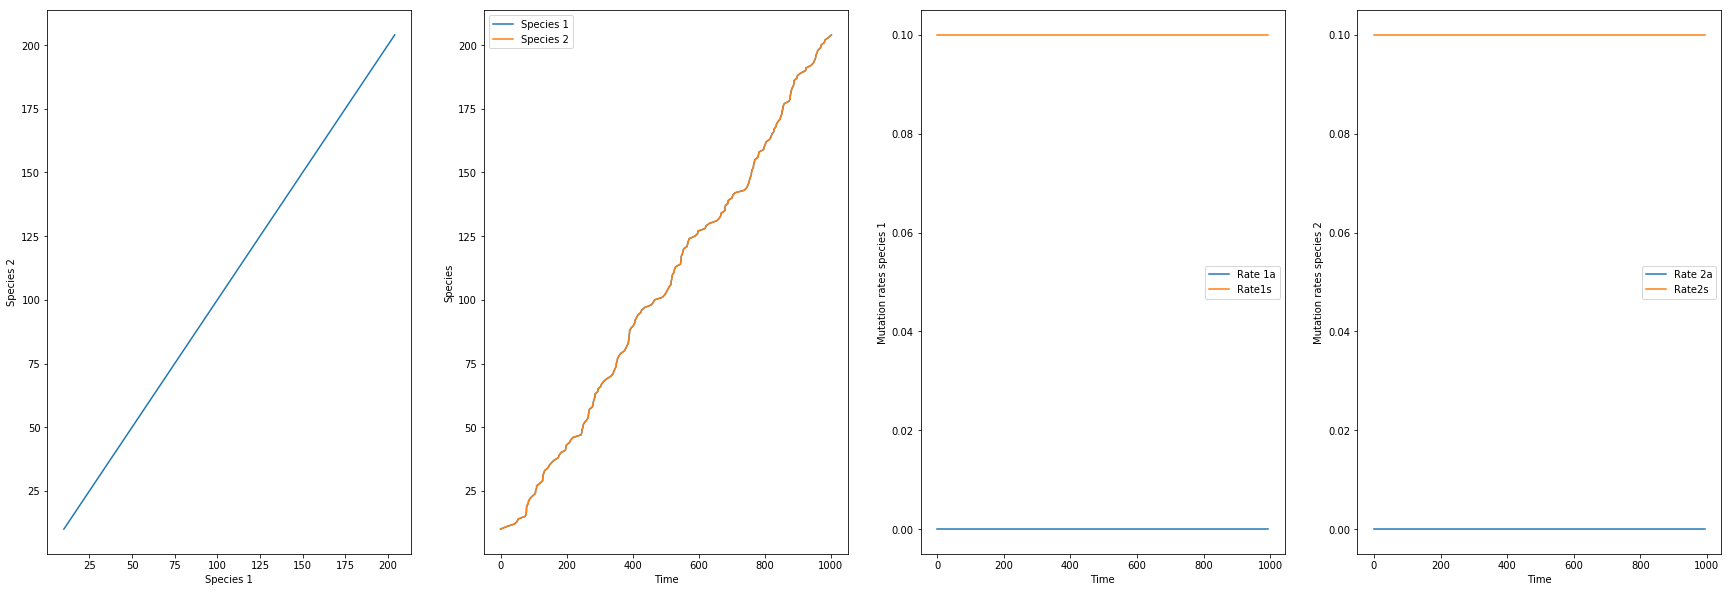

In [5]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

## I. All u are the same. 
### (2.) No s(synergistic) mutations

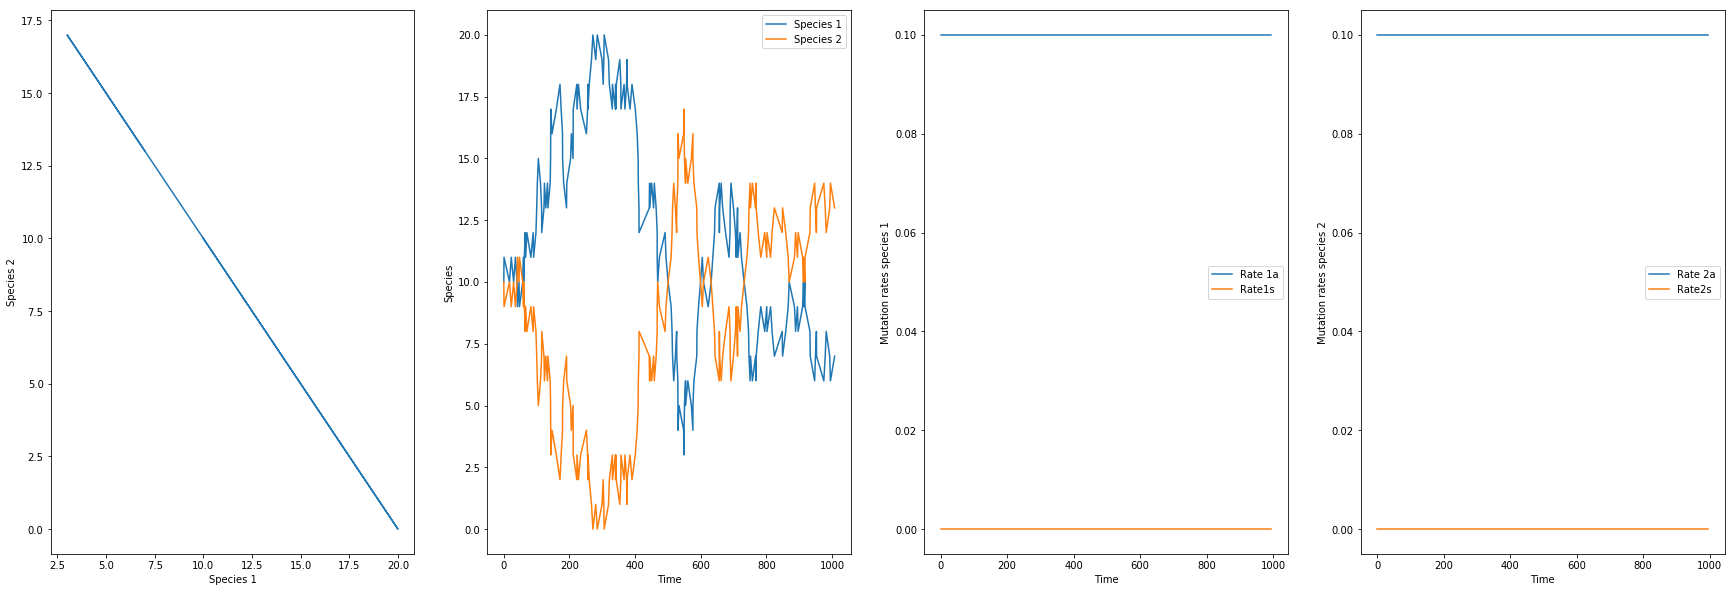

In [44]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0
u2a=0.1
u2s=0

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

## I. All u are the same. 
### (3.) 50% - 50% a and s.

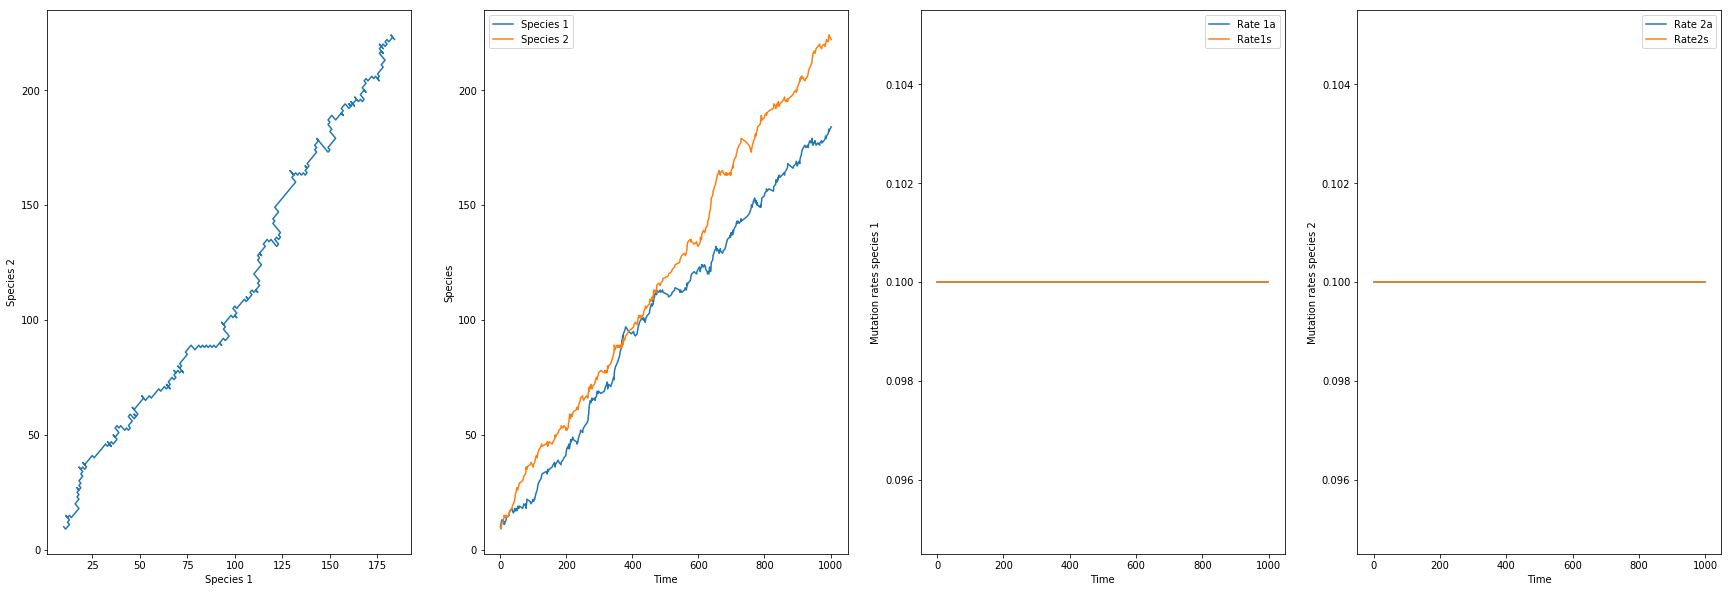

In [34]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0.1
u2a=0.1
u2s=0.1

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

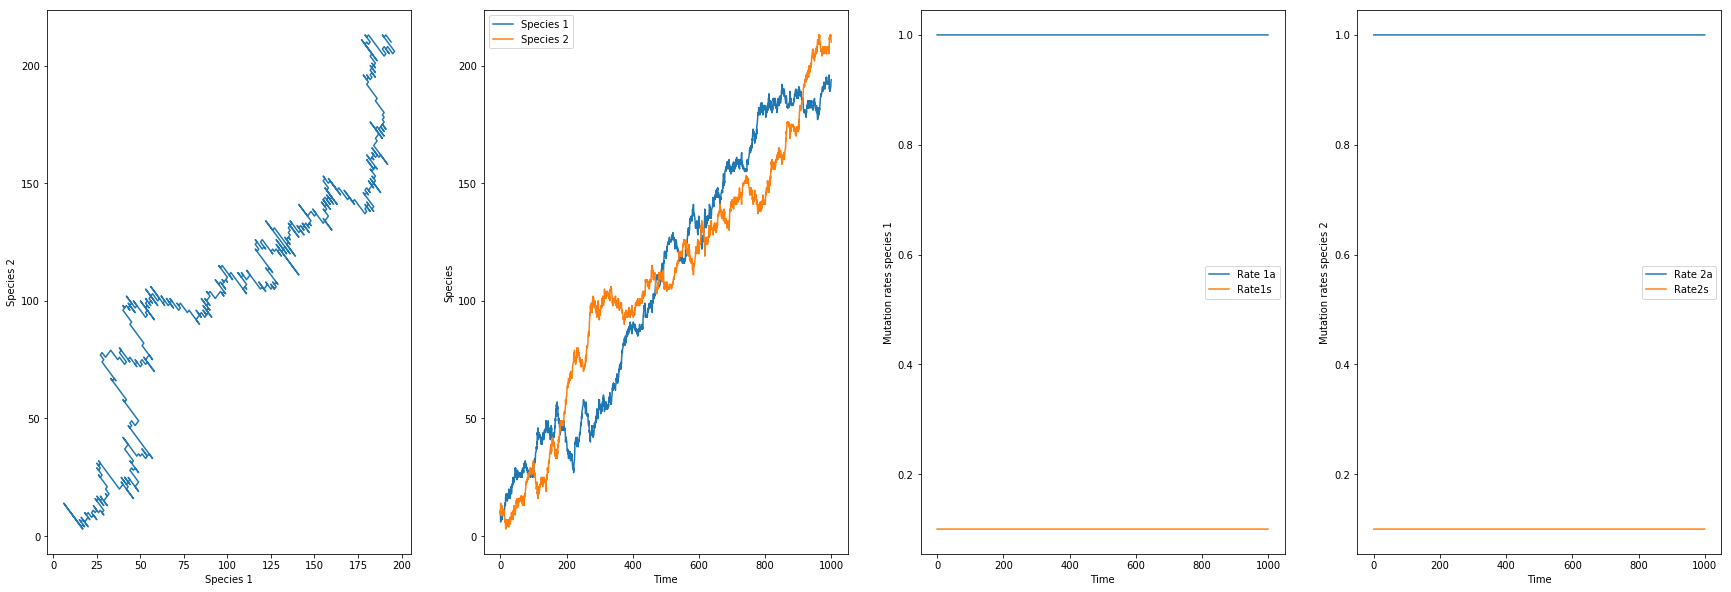

In [50]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=1
u1s=0.1
u2a=1
u2s=0.1

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

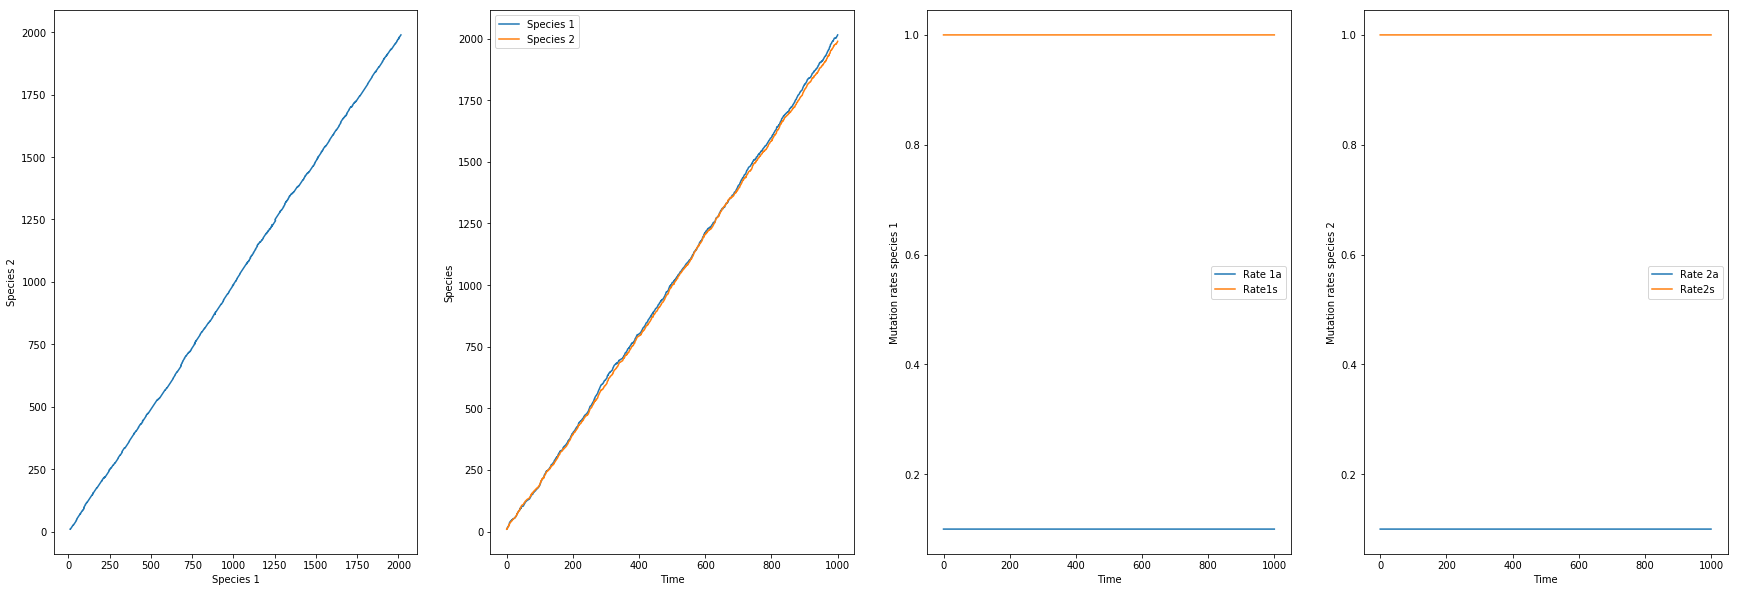

In [31]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=1
u2a=0.1
u2s=1

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

In [51]:
import sympy as sy

In [62]:
def myformula(formula, **kwargs):
    expr = sy.sympify(formula)
    return expr.evalf(subs=kwargs)

In [61]:
myformula(x=2,y=2,z=1,formula="x+2*y/z")

x + 2*y/z


In [83]:
## Complex version of Function

def coEvo_v2(X,Y,_alpha1,_beta1,_alpha2,_beta2,num,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((100000,3))
    mutrate1a = np.zeros((100000,1))
    mutrate1s = np.zeros((100000,1))
    mutrate2a= np.zeros((100000,1))
    mutrate2s= np.zeros((100000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
    
    # Main loop
    while t < T and ((count1)<100000):
        if X == 0 | Y==0:
            break
        
        u1a =num-(X *_alpha1)
        u1s =num-(X *_beta1) 
        u2a =num-(Y *_alpha2) 
        u2s =num-(Y *_beta2)

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0

        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s
        if W == 0: break
            
        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1

        data[count1,:]=[t, X, Y]
        count1+=1
        
    data=data[0:count1,:]
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;


## III. Species are symmetric. And rates depend on fitness. Keep slopes the same

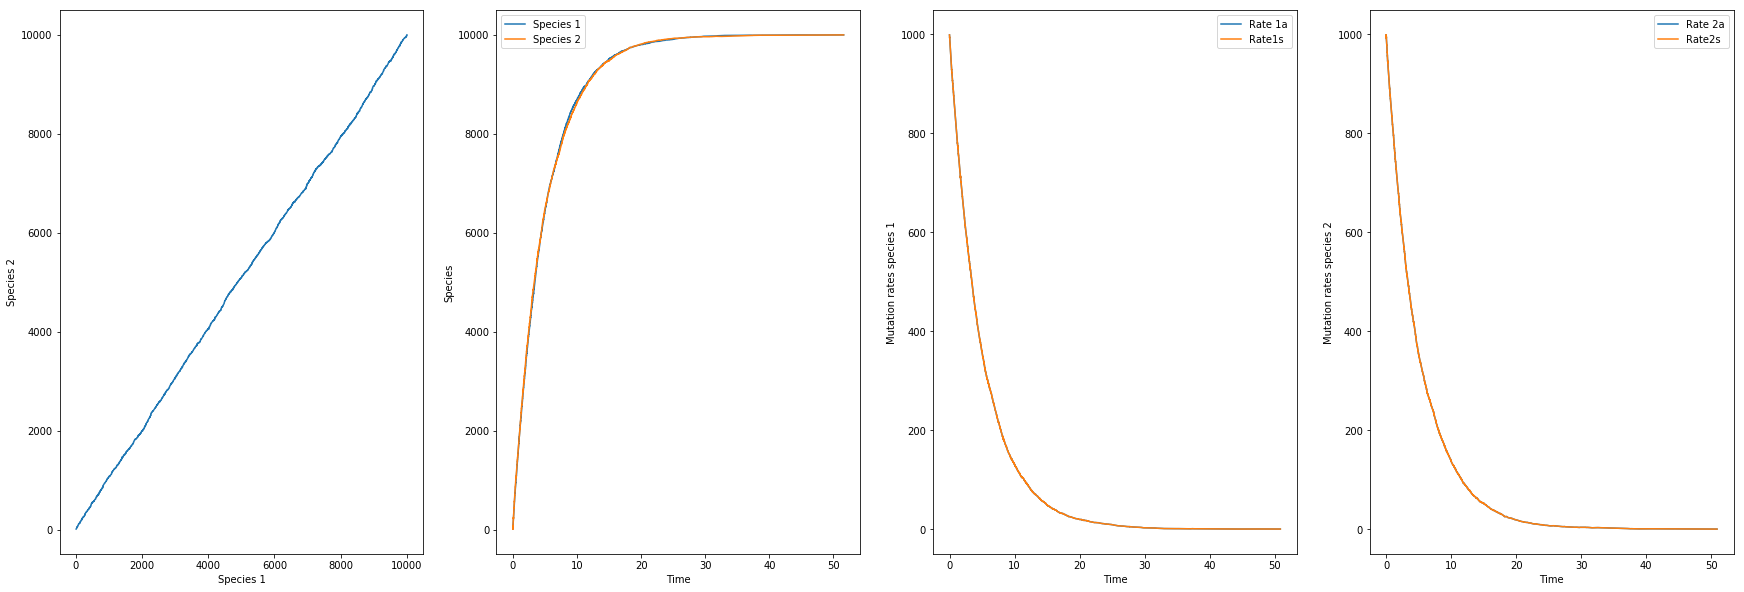

In [84]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0.1
_beta1 = 0.1
_alpha2 = 0.1
_beta2 = 0.1

num=1000

coEvo_v2(X,Y,_alpha1,_beta1,_alpha2,_beta2,num,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

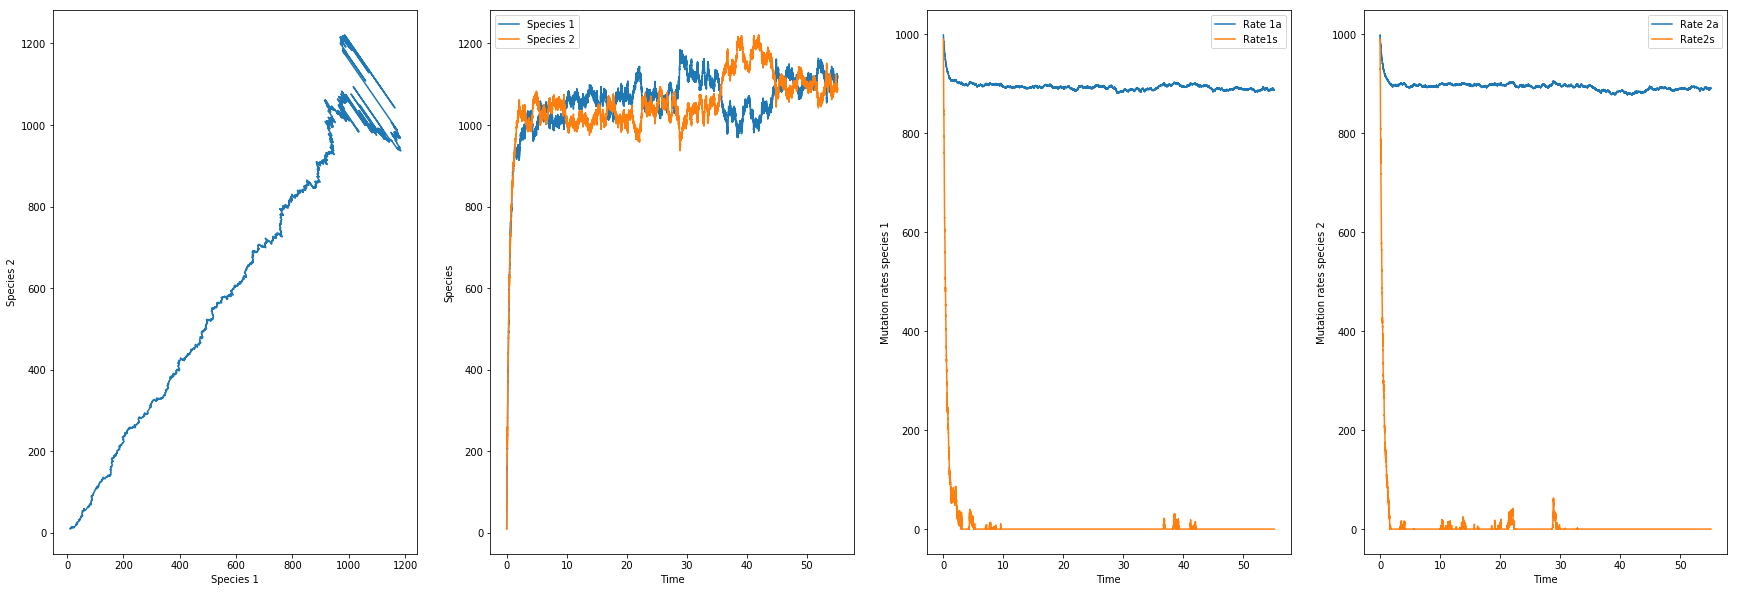

In [90]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0.1
_beta1 = 1
_alpha2 = 0.1
_beta2 = 1

num=1000

coEvo_v2(X,Y,_alpha1,_beta1,_alpha2,_beta2,num,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

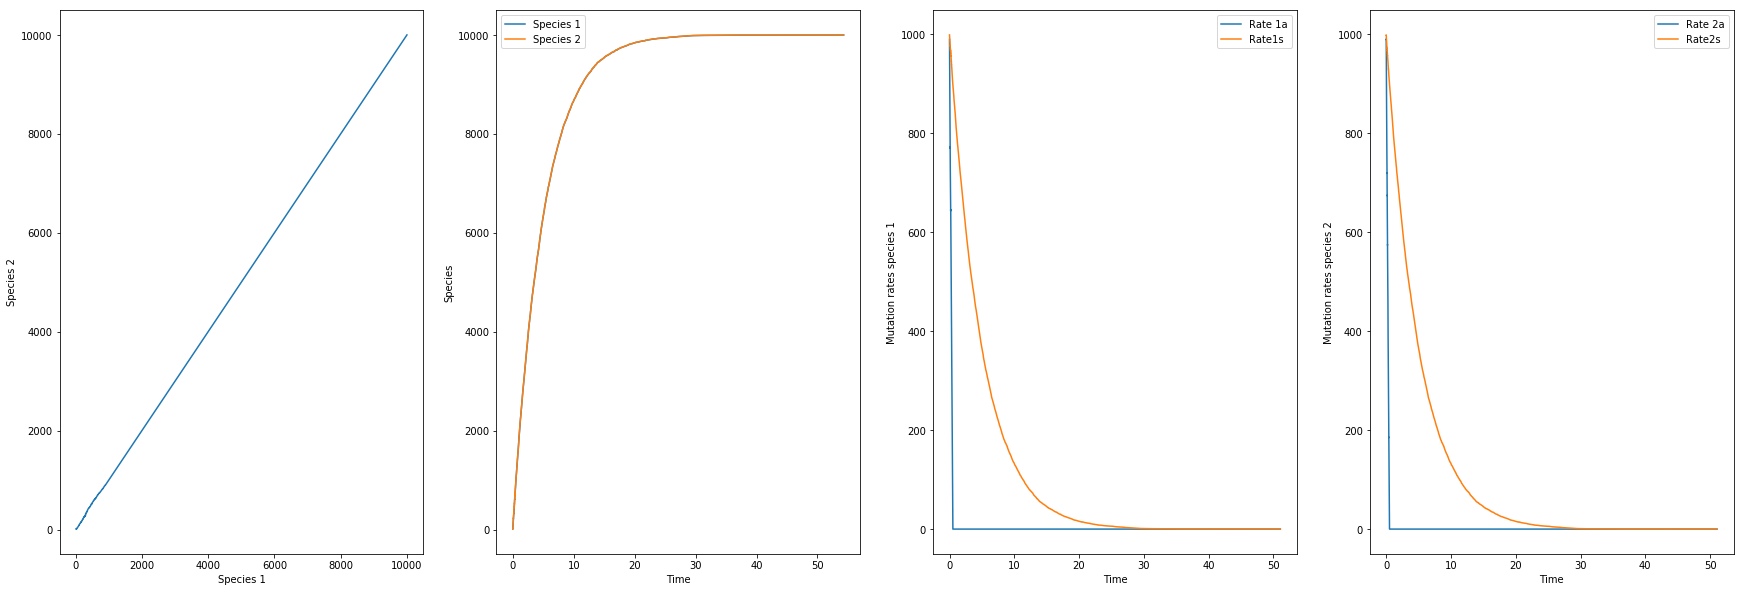

In [88]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 1
_beta1 = 0.1
_alpha2 = 1
_beta2 = 0.1

num=1000

coEvo_v2(X,Y,_alpha1,_beta1,_alpha2,_beta2,num,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

## V. Species are different.
### Case 1.I: All u are the same. 

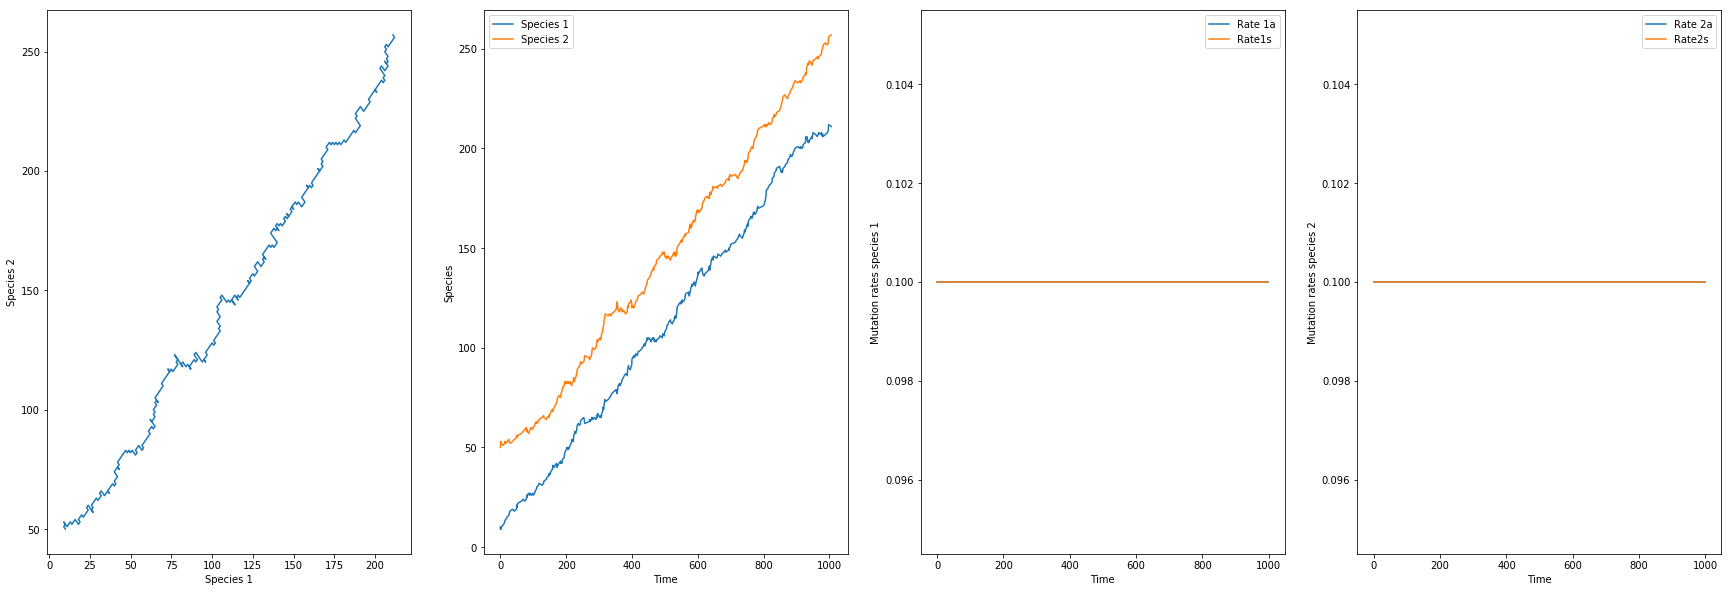

In [93]:
# Input parameters ####################
# int; total population
X = 10
Y = 50

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0.1
u2a=0.1
u2s=0.1

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

## V. Species are different.
### Case 2.I: No a (antagonistic) mutations for both

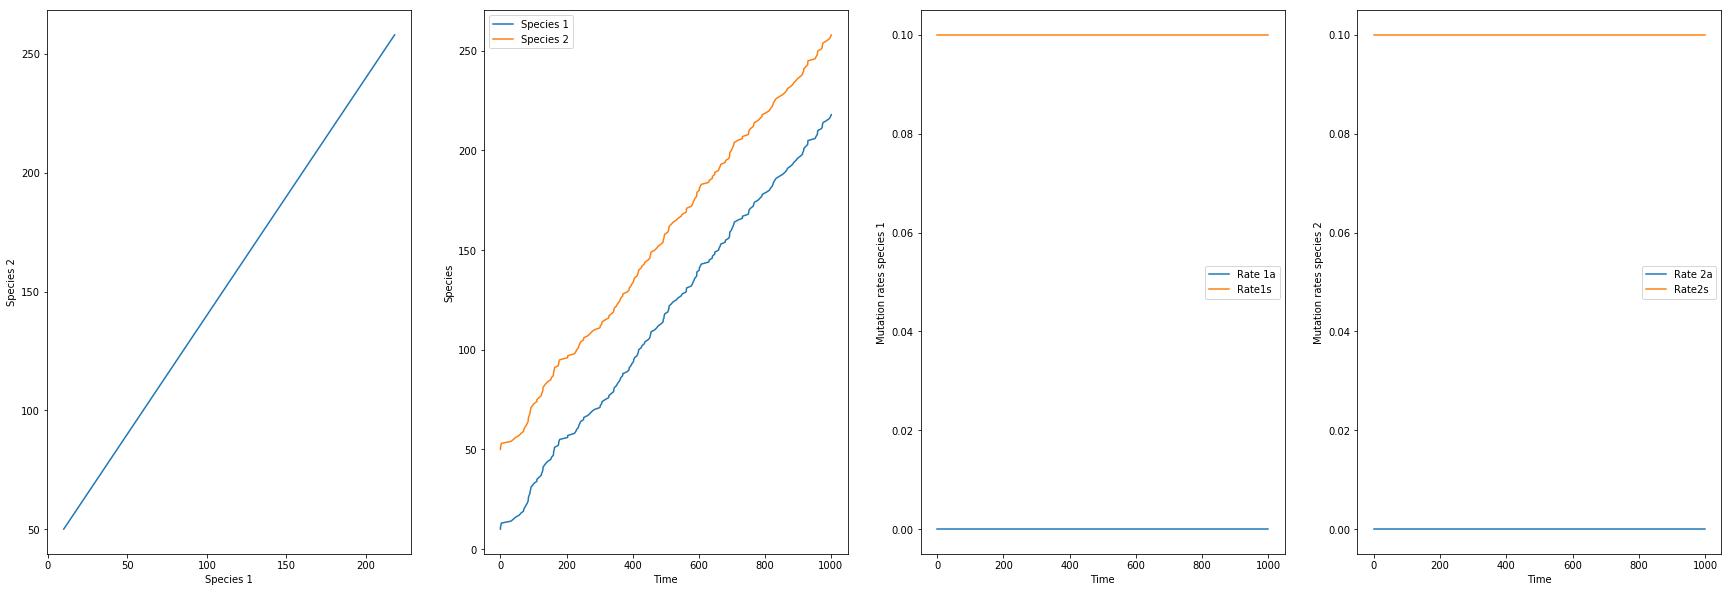

In [94]:
# Input parameters ####################
# int; total population
X = 10
Y = 50

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1

coEvo(X,Y,u1a,u1s,u2a,u2s,T,t)

## V. Species are different.
### Case 1.I: All u are the same. 
### Case 2.I: No a (antagonistic) mutations
### Case 3.I: No s( synergistic) mutations
### Case 4.I: 50% - 50% a and s.
### Case 5.II: Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 6.III: Species are symmetric. And rates depend on fitness. Keep slopes the same
### Case 7.IV: Species are symmetric. Slopes are different between a and s.